# Aula 1

In [ ]:
import pandas as pd
uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns = ['filme_id', 'titulo', 'genero']
filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
generos = filmes.genero.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_filmes = pd.concat([filmes, generos], axis=1)
dados_filmes.head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

#Aula 2

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print('Grupos {}'.format(modelo.labels_))

Grupos [2 2 0 ... 0 2 0]


In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6df475f28>,
      dtype=object)

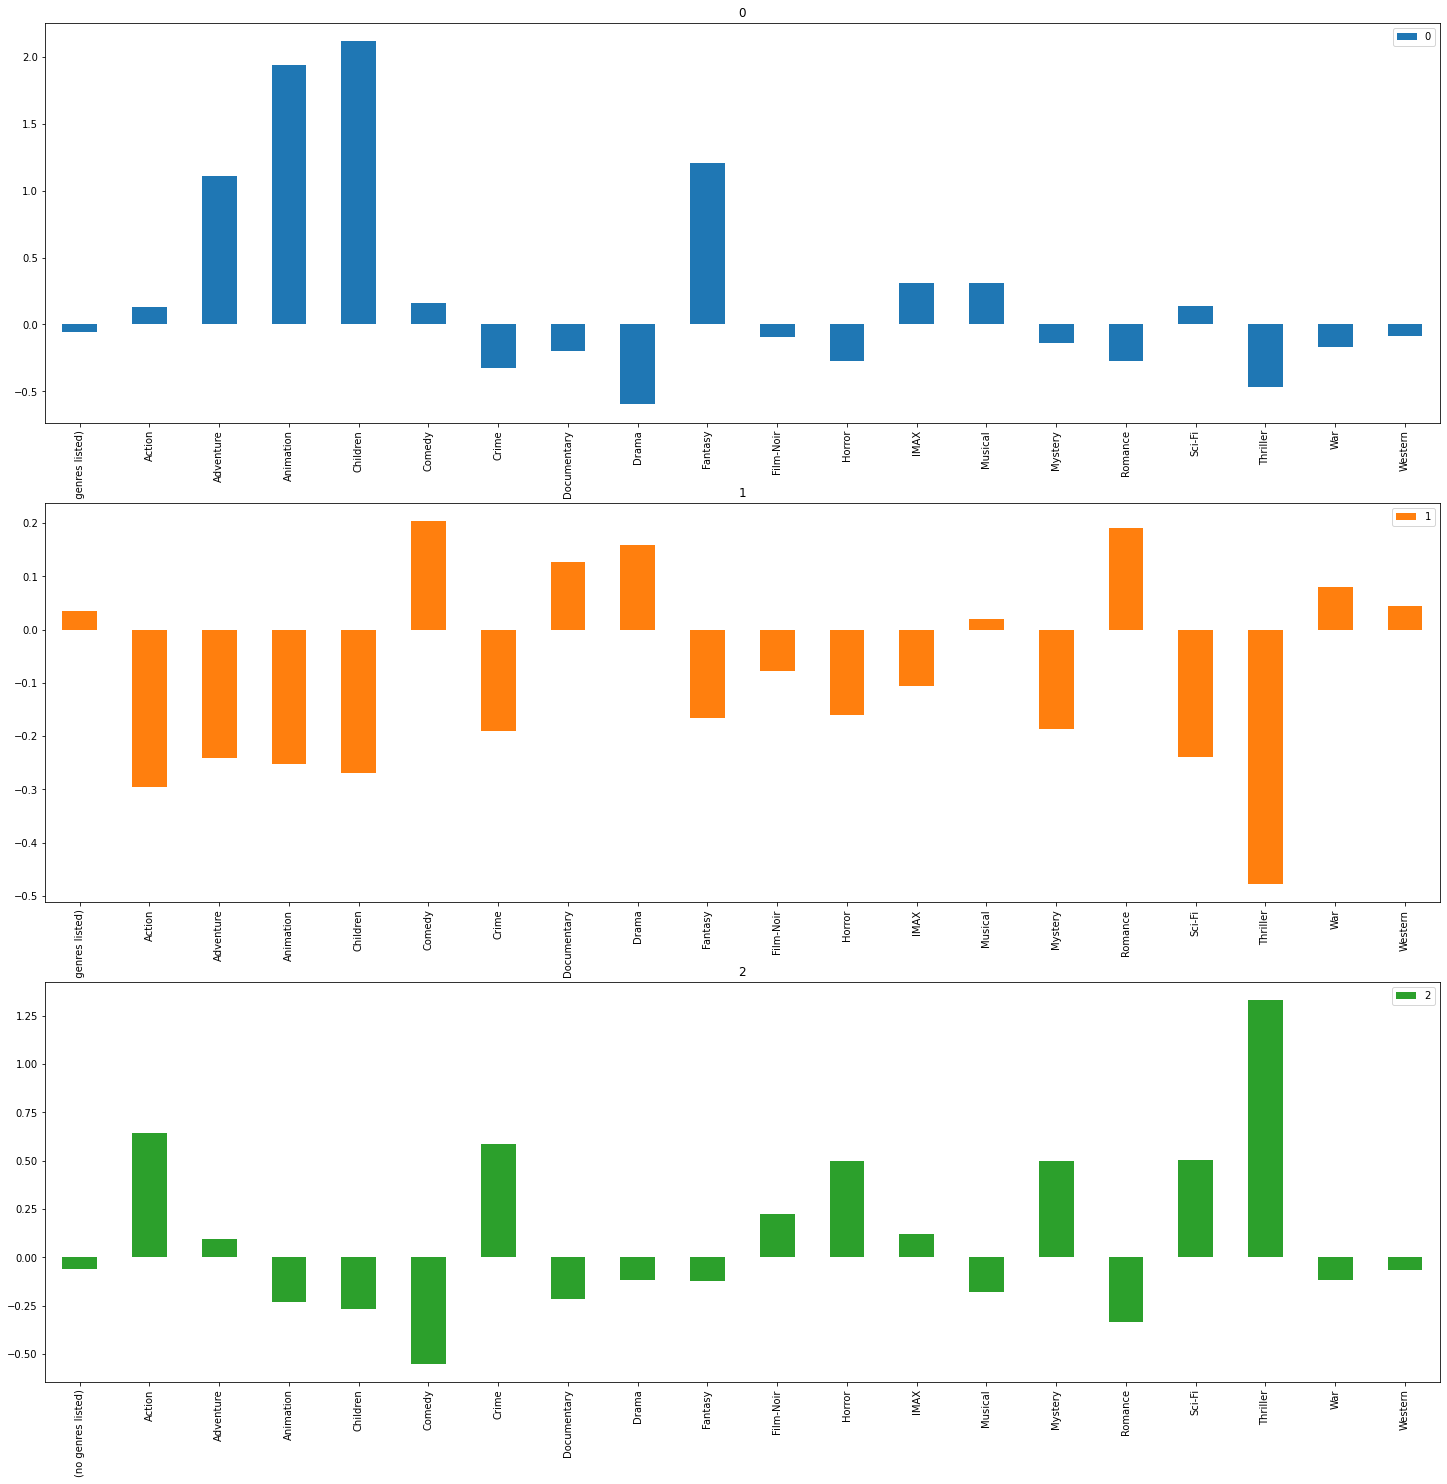

In [ ]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25),sharex=False)

In [ ]:
grupo = 0
filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8418,110781,Mulan II (2004),Action|Animation|Children|Comedy|Musical,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6760,59784,Kung Fu Panda (2008),Action|Animation|Children|Comedy|IMAX,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6946,65359,Earthsea (Legend of Earthsea) (2004),Adventure|Drama|Fantasy,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9120,145935,"Peanuts Movie, The (2015)",Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4230,6158,"Jungle Book 2, The (2003)",Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8698,122924,X-Men: Apocalypse (2016),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8273,105468,Cloudy with a Chance of Meatballs 2 (2013),Animation|Children|Comedy|Fantasy,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8361,109042,Knights of Badassdom (2013),Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4441,6559,Little Giants (1994),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1596,2138,Watership Down (1978),Adventure|Animation|Children|Drama|Fantasy,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


# Aula 3

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-26.486208 , -49.578022 ],
       [-58.499397 ,   5.6890783],
       [ 11.363076 , -40.45133  ],
       ...,
       [ 15.576464 ,  18.00653  ],
       [-44.473553 ,  -4.14552  ],
       [ -2.4164424, -20.557482 ]], dtype=float32)

In [ ]:
import seaborn as sns

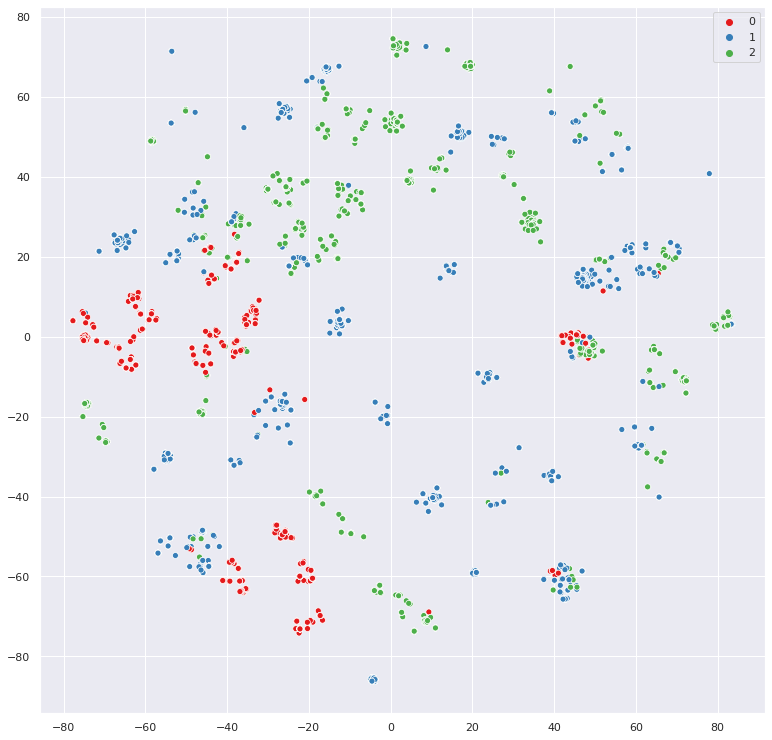

In [ ]:
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1], 
                hue=modelo.labels_,palette=sns.color_palette('Set1',3))

#Aula 4

In [ ]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6dc0bc780>,
      dtype=object)

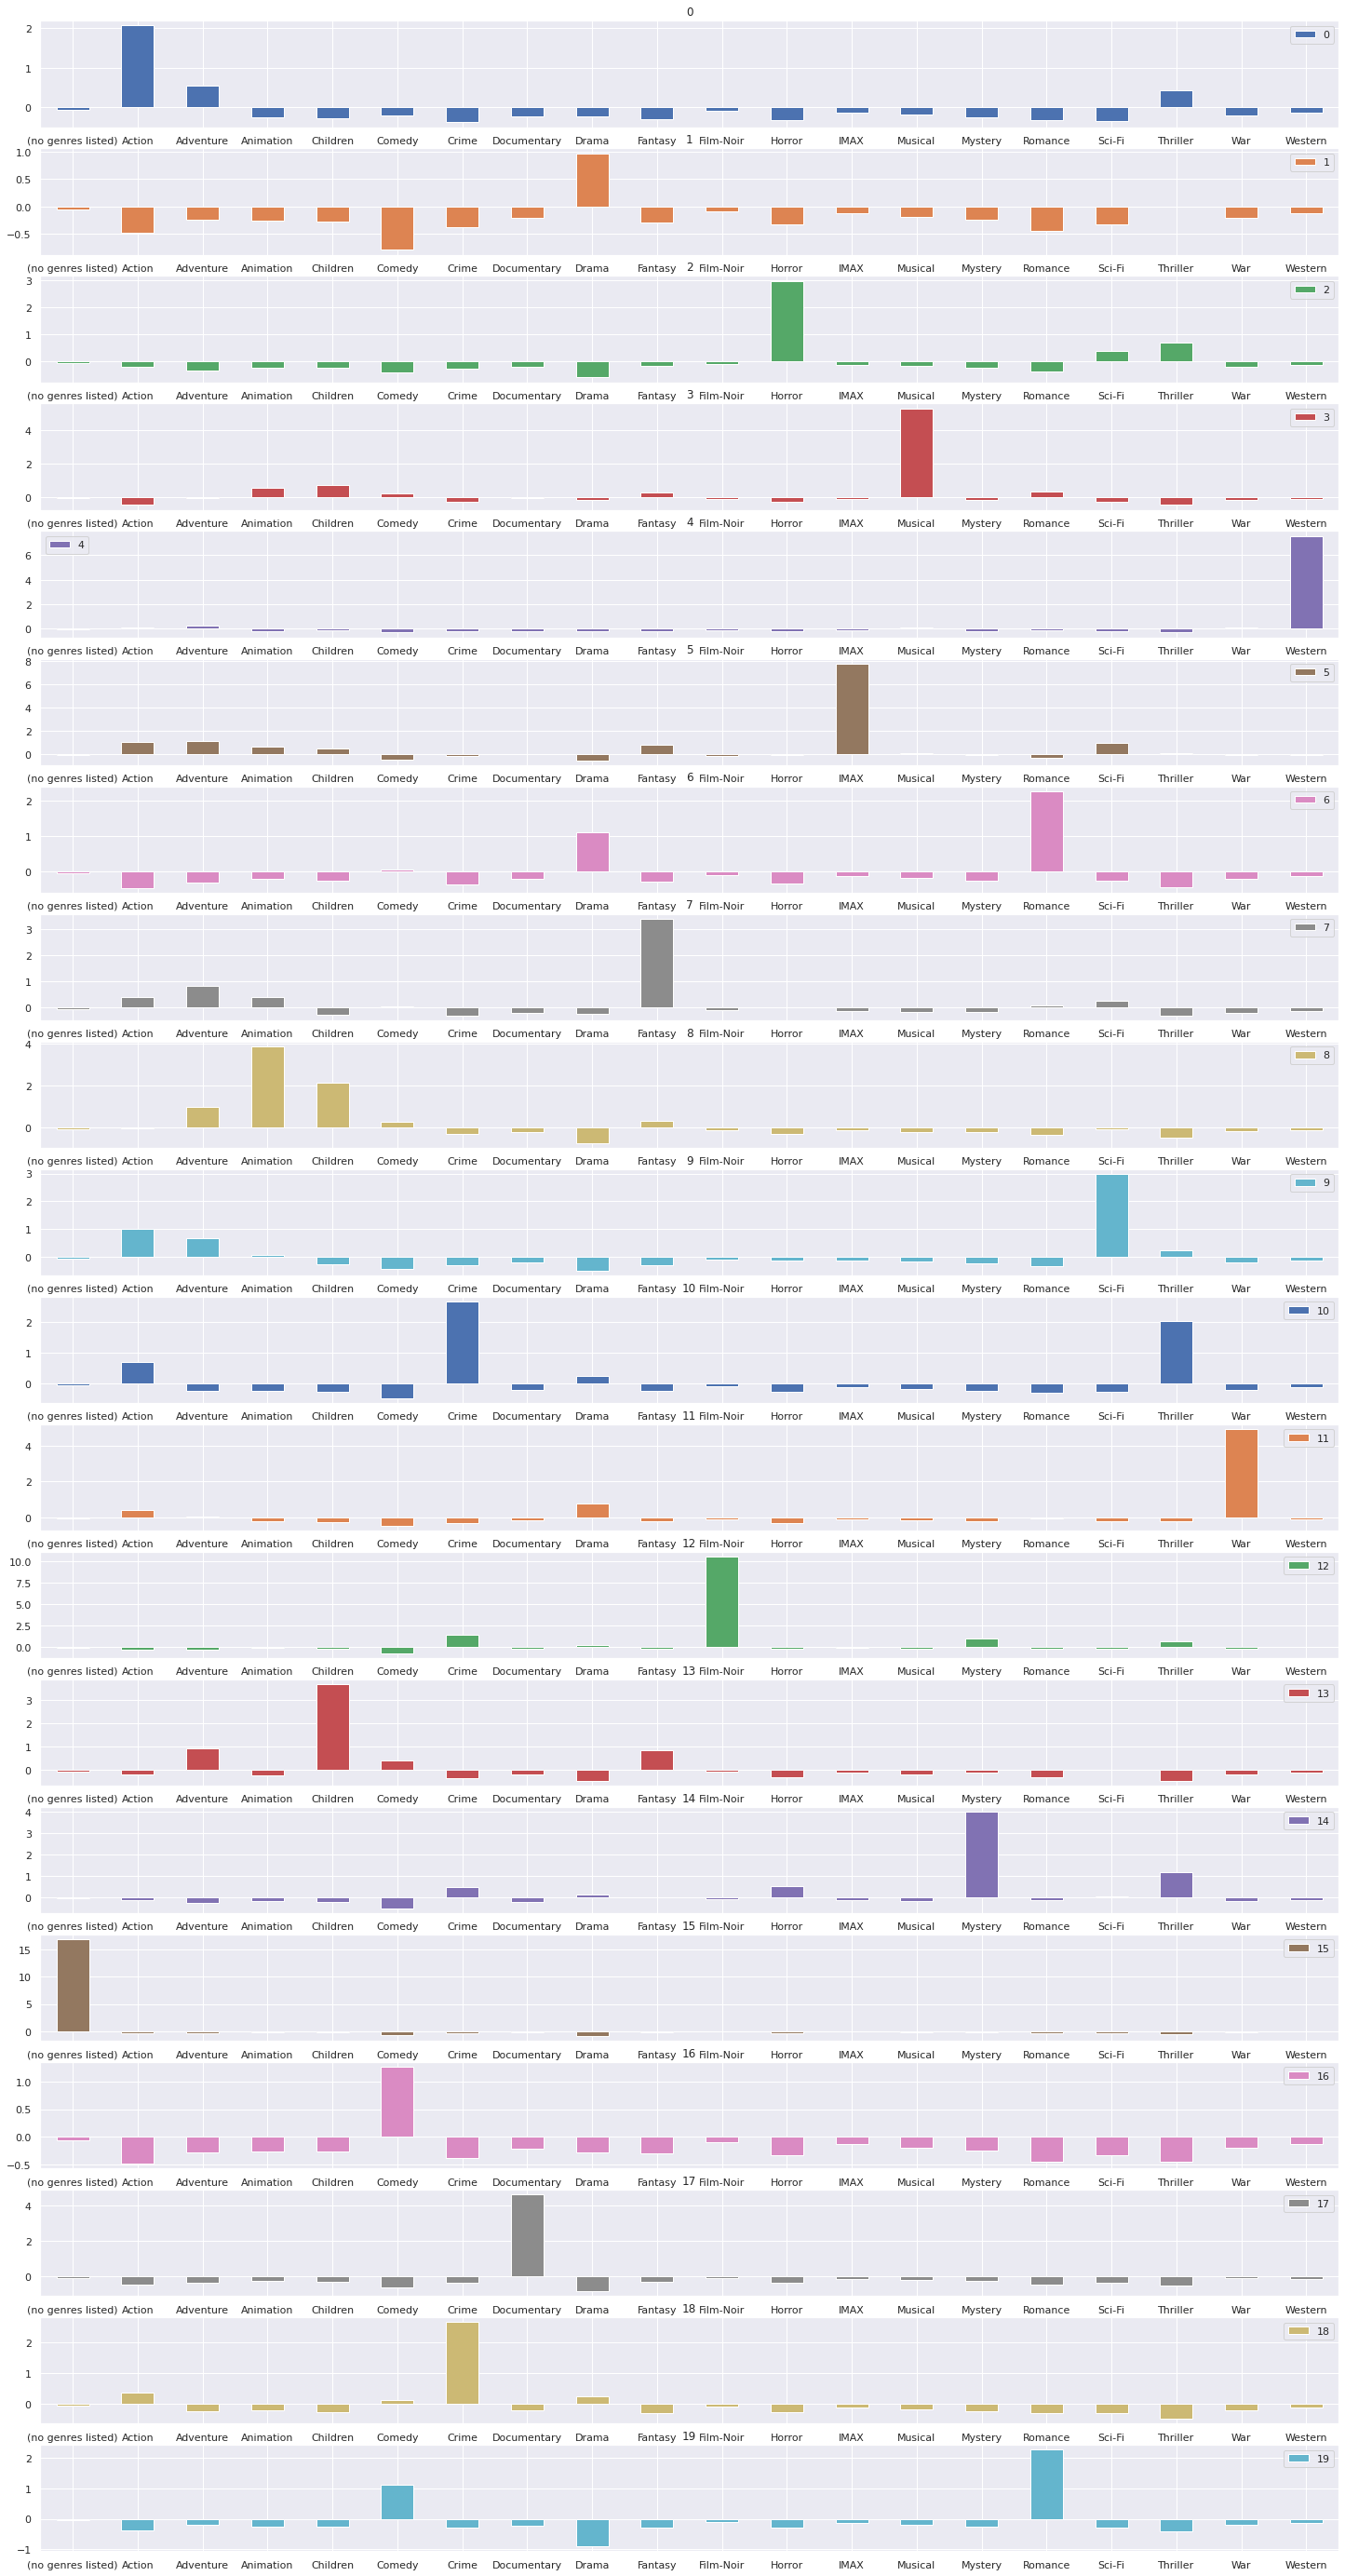

In [ ]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [ ]:
grupo = 15
filtro = modelo.labels_ == grupo
dados_filmes[filtro].head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8517,114335,La cravate (1957),(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8684,122888,Ben-hur (2016),(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8782,129250,Superfast! (2015),(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8836,132084,Let It Be Me (1995),(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def kmeans(numeros_clusters, generos_filmes):
  modelo = KMeans(n_clusters=numeros_clusters)
  modelo.fit(generos_filmes)
  return[numeros_clusters, modelo.inertia_]

In [ ]:
kmeans(20, generos_escalados)

[20, 54641.74179329286]

In [ ]:
resultado = [kmeans(n_grupos, generos_escalados) for n_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179774.32093709186],
 [3, 166382.19759558106],
 [4, 159587.7157415802],
 [5, 147545.34284619673],
 [6, 137349.58276012575],
 [7, 127857.1583948072],
 [8, 119231.63603375242],
 [9, 111832.03694187636],
 [10, 103137.87967628628],
 [11, 95272.98939348466],
 [12, 86840.59537109712],
 [13, 81213.04165258861],
 [14, 73091.17864646617],
 [15, 69415.16126397642],
 [16, 65951.67110347465],
 [17, 60501.10567458765],
 [18, 58877.716063361484],
 [19, 57095.50883253501],
 [20, 55346.39339360594],
 [21, 53705.4098106491],
 [22, 51613.86988787896],
 [23, 51149.97371966703],
 [24, 48910.27112166269],
 [25, 47615.02565163457],
 [26, 47186.97937741489],
 [27, 45269.3813906649],
 [28, 45033.42135041325],
 [29, 44283.07331398841],
 [30, 43248.52443488182],
 [31, 42429.87813835115],
 [32, 40168.814988455415],
 [33, 39991.53884342879],
 [34, 38896.537849100045],
 [35, 38080.38051138525],
 [36, 38380.91263286524],
 [37, 36839.9021349503],
 [38, 36788.92456679026],
 [39, 35364.78833828774

In [ ]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado.head()

,grupos,inertia
0,1,194840.000000
1,2,179774.320937
2,3,166382.197596
3,4,159587.715742
4,5,147545.342846


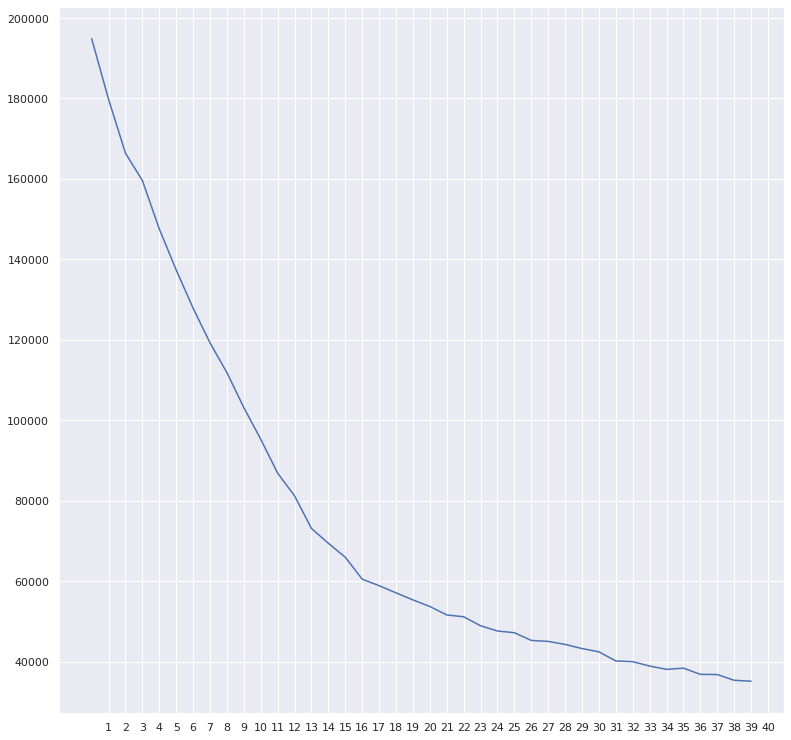

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos)

In [ ]:
modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6db28a048>,
      dtype=object)

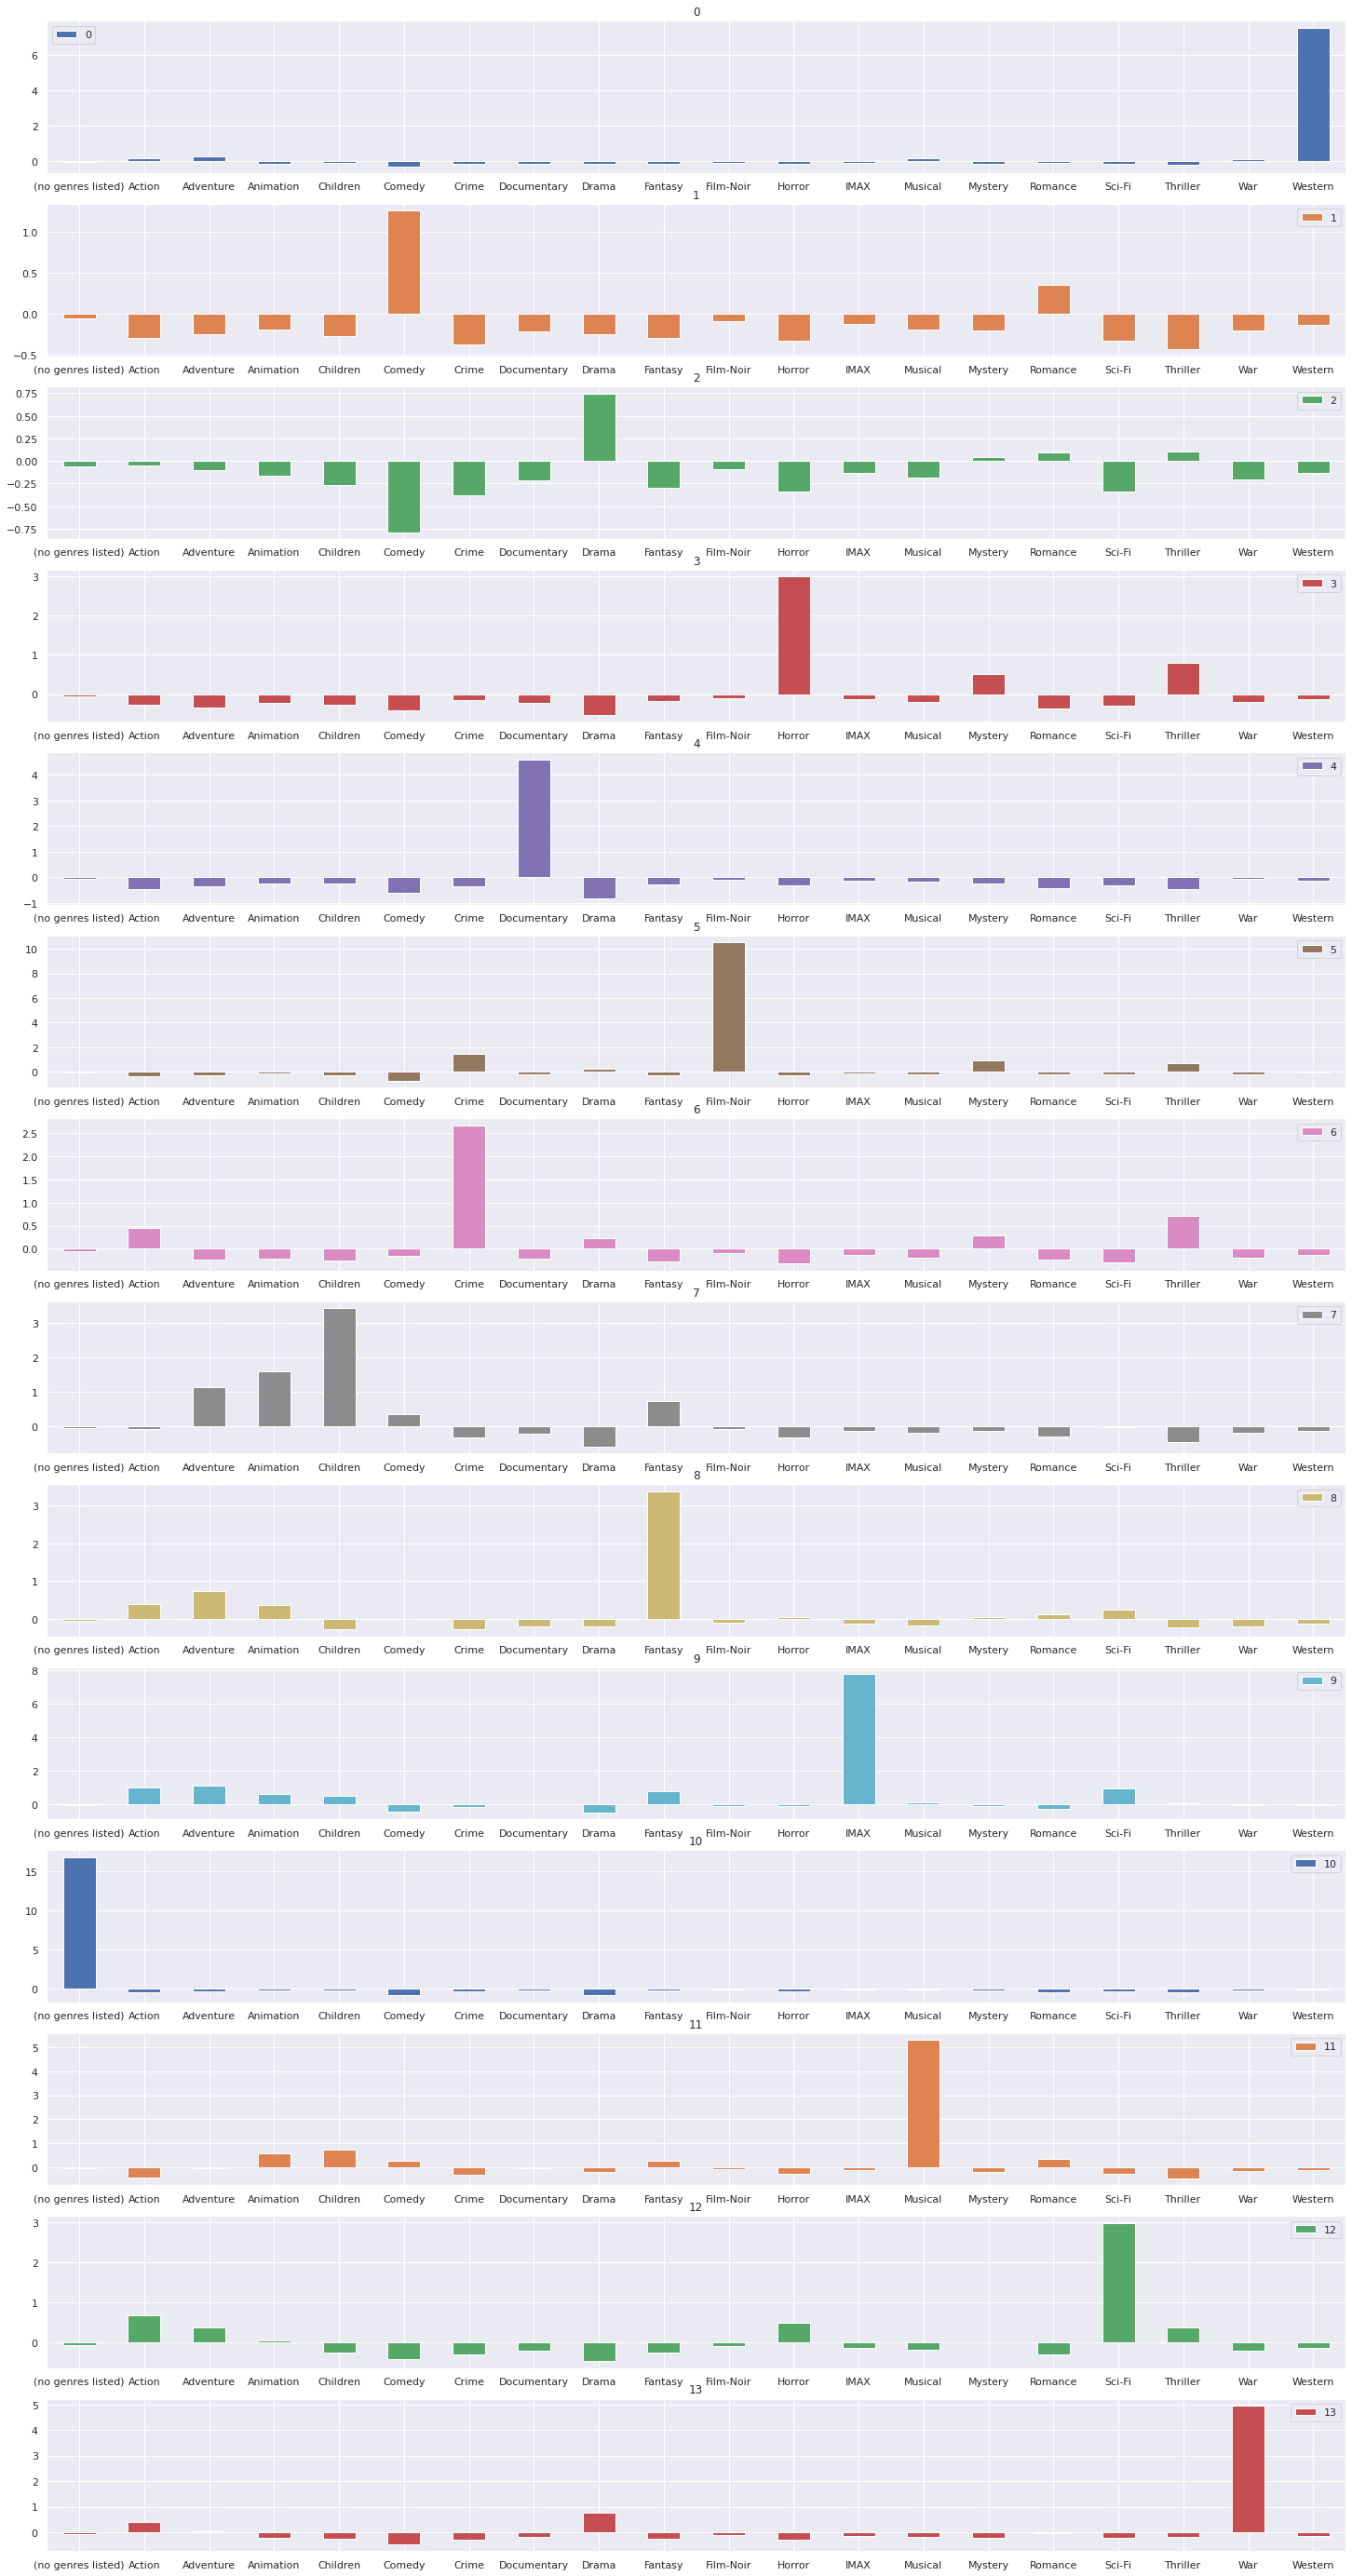

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

#Aula 5

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=14)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

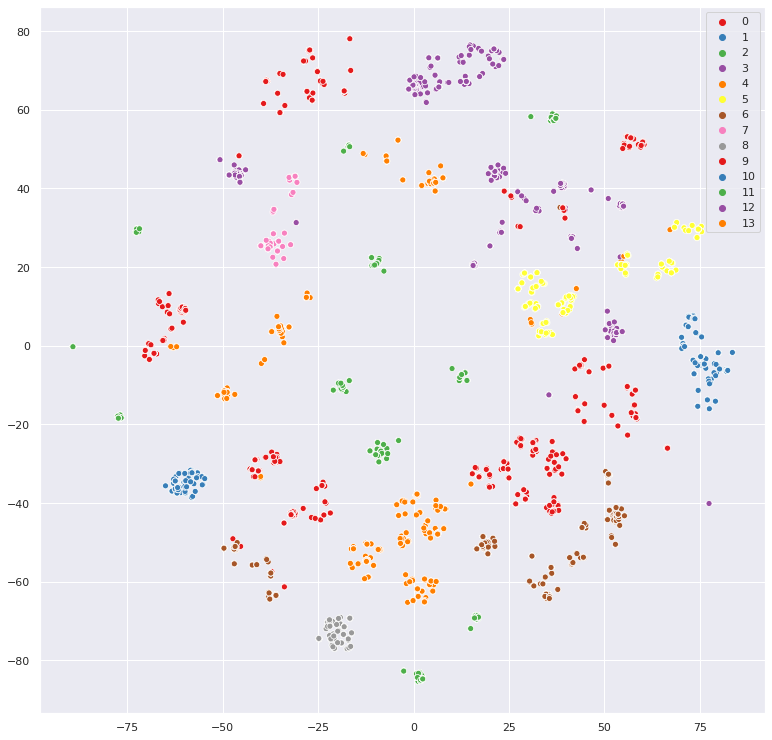

In [ ]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos,
                palette=sns.color_palette('Set1', 14))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6ce680ba8>,
      dtype=object)

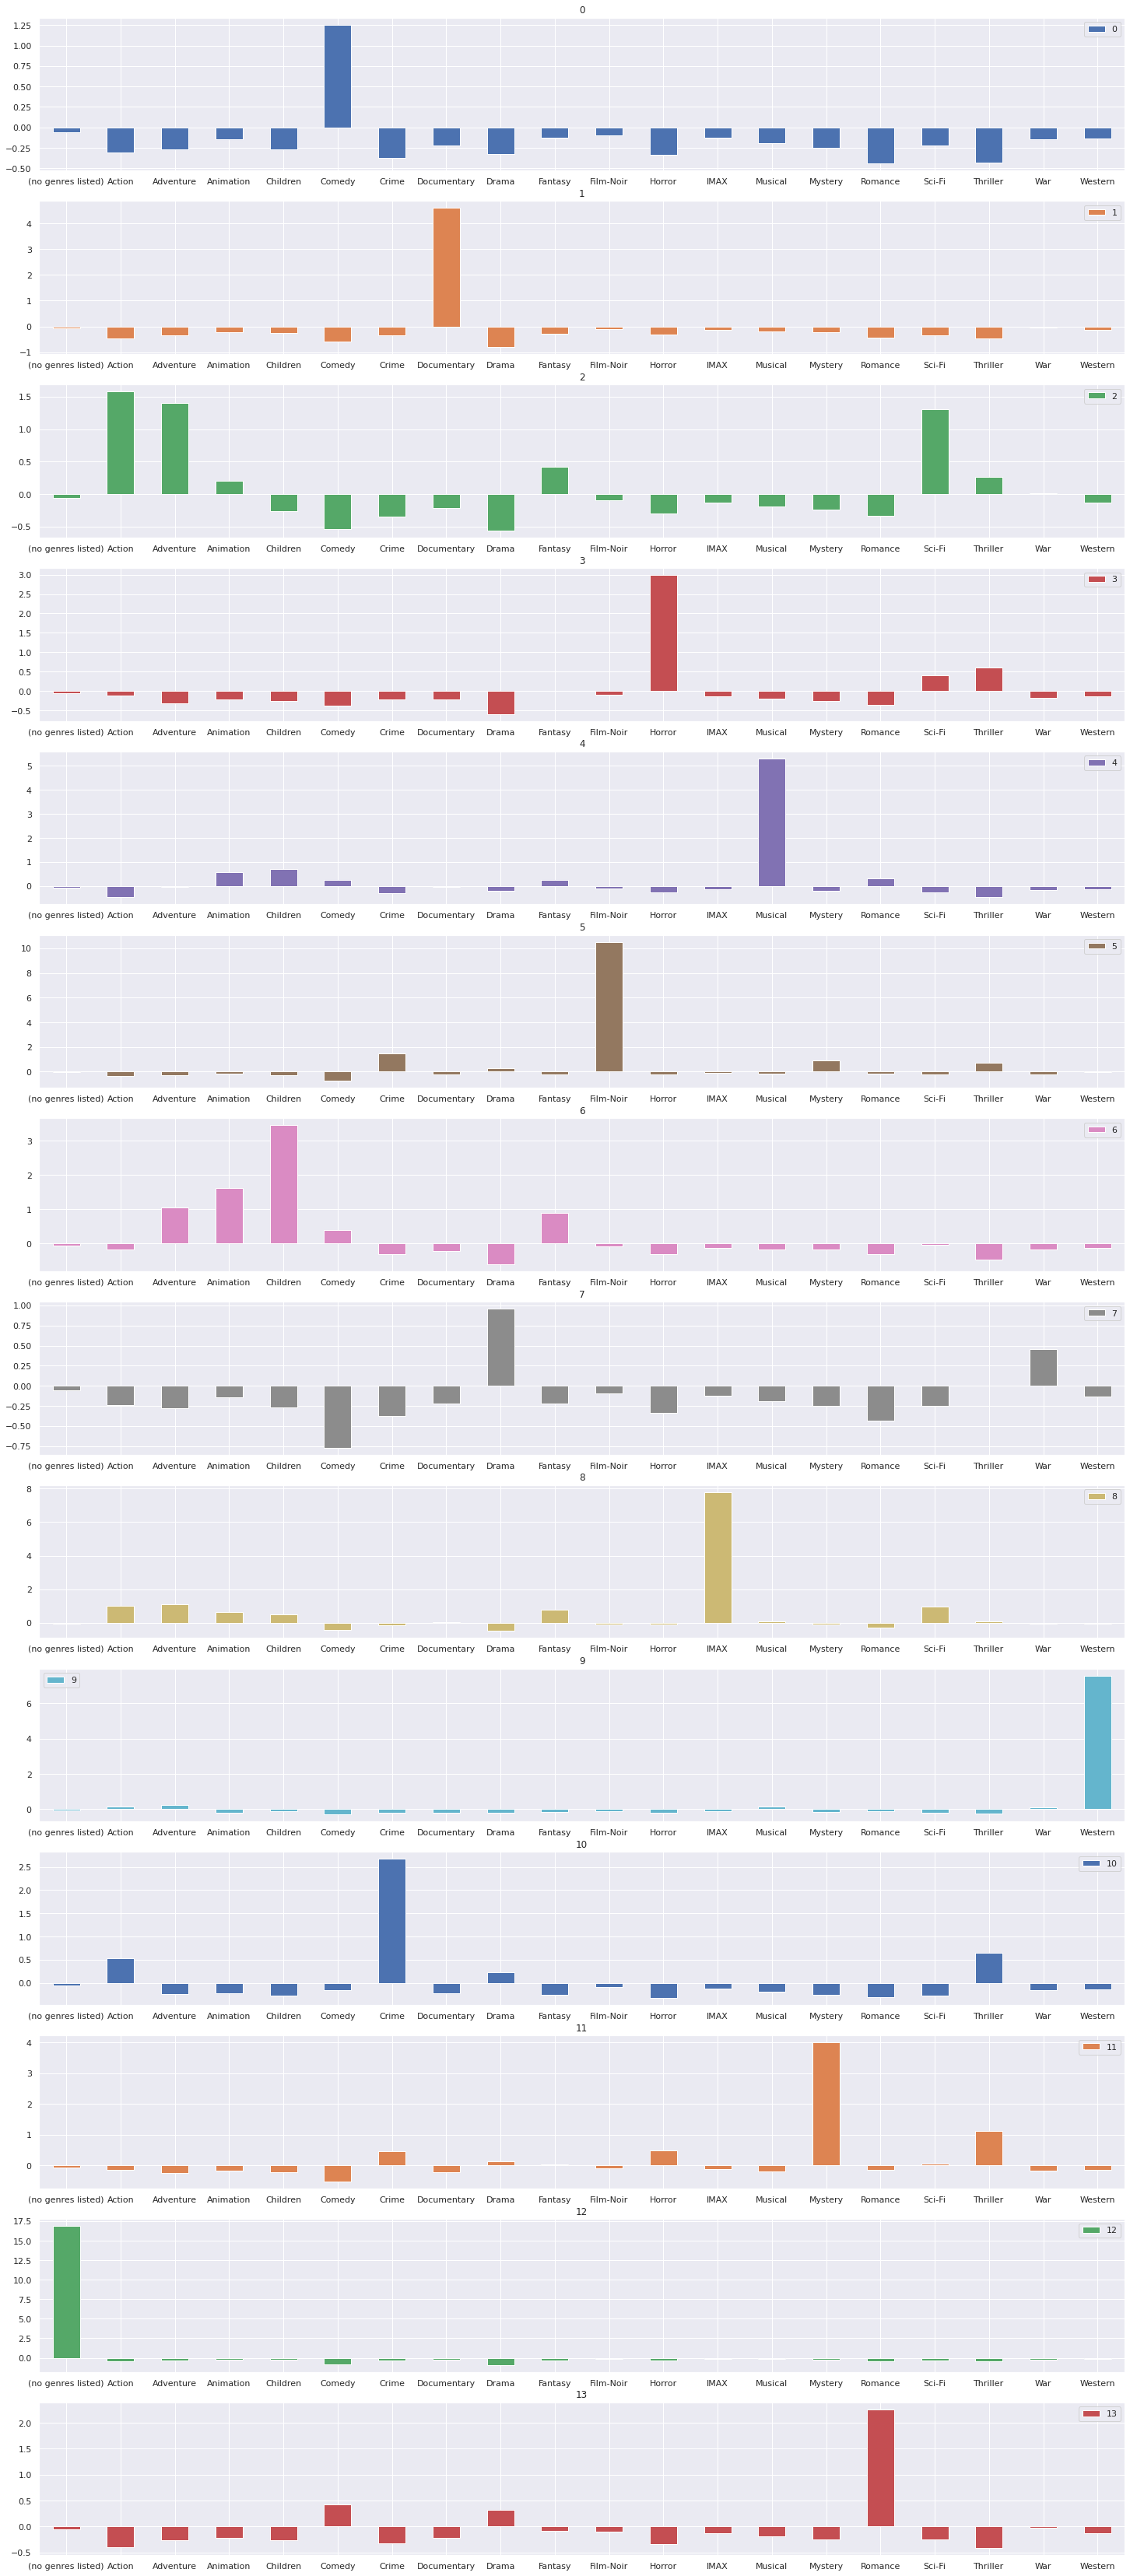

In [ ]:
modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,60), sharex=False, rot=0)

In [ ]:
matriz_dist = linkage(grupos)
matriz_dist

array([[ 0.        ,  7.        ,  2.51674229,  2.        ],
       [13.        , 14.        ,  2.90746763,  3.        ],
       [10.        , 15.        ,  3.40818628,  4.        ],
       [ 2.        , 16.        ,  3.4250176 ,  5.        ],
       [ 3.        , 17.        ,  3.86530551,  6.        ],
       [ 6.        , 18.        ,  4.54295095,  7.        ],
       [11.        , 19.        ,  4.70804369,  8.        ],
       [ 1.        , 20.        ,  5.18496292,  9.        ],
       [ 4.        , 21.        ,  5.7968518 , 10.        ],
       [ 9.        , 22.        ,  7.86106396, 11.        ],
       [ 8.        , 23.        ,  8.02248242, 12.        ],
       [ 5.        , 24.        , 10.81684532, 13.        ],
       [12.        , 25.        , 17.08139436, 14.        ]])

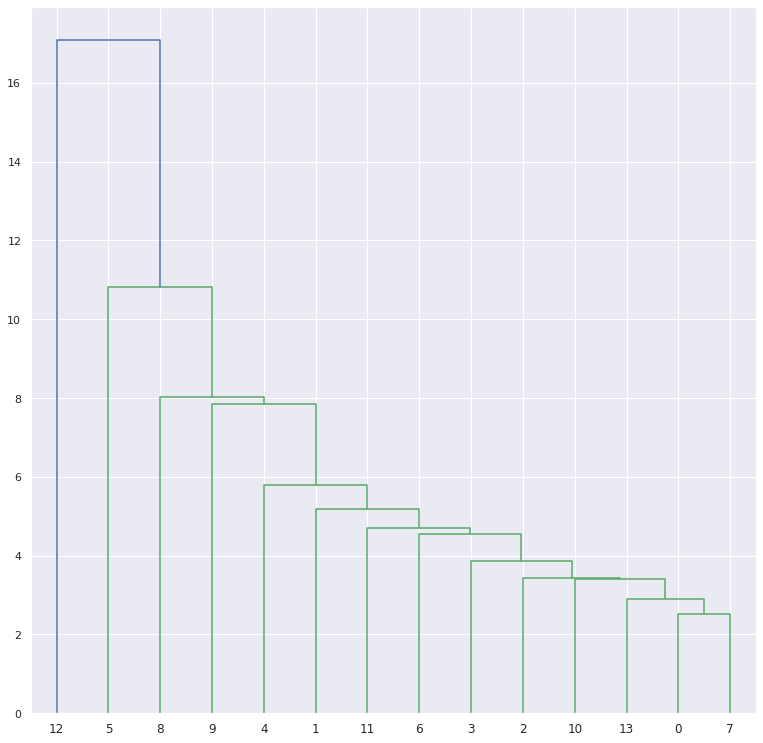

In [ ]:
dendograma = dendrogram(matriz_dist)